In [32]:
import os
from os import listdir

In [33]:
train_data=r'E:\casting_512x512\Train'
test_data=r'E:\casting_512x512\Test'

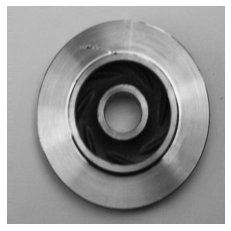

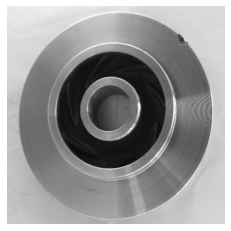

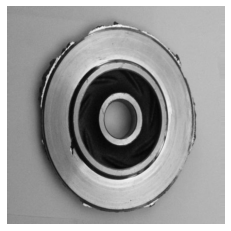

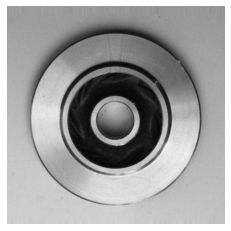

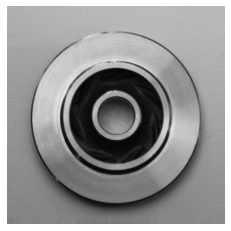

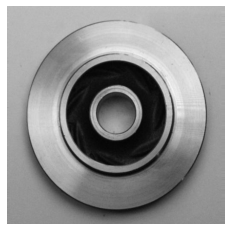

In [34]:
# Let's try to print some of the scrapped images from each category
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

df_front_train=r'E:\casting_512x512\Train\def_front_train'
ok_front_train=r'E:\casting_512x512\Train\ok_front_train'



casting_train=[df_front_train,ok_front_train]
for dirs in casting_train:
    k=listdir(dirs)
    for i in k[:3]:
        img=mpimg.imread('{}/{}'.format(dirs,i))
        plt.imshow(img)
        plt.axis('off')
        plt.show()

In [35]:
file1 = os.listdir(r'E:\casting_512x512\Train')
file1

['def_front_train', 'ok_front_train']

In [36]:
file2 = os.listdir(r'E:\casting_512x512\Test')
file2

['def_front_test', 'ok_front_test']

In [37]:
print("Count of Training Images")
print("No.of Images of defective images in train dataset -> ",len(os.listdir(r'E:\casting_512x512\Train\def_front_train')))
print("No.of Images of ok images in train dataset -> ",len(os.listdir(r'E:\casting_512x512\Train\ok_front_train')))
"\n"

print("Count of Test Images")
print("No.of Images of defective in test dataset-> ",len(os.listdir(r'E:\casting_512x512\Test\def_front_test')))
print("No.of Images of ok in test dataset ->",len(os.listdir(r'E:\casting_512x512\Test\ok_front_test')))


Count of Training Images
No.of Images of defective images in train dataset ->  539
No.of Images of ok images in train dataset ->  399
Count of Test Images
No.of Images of defective in test dataset->  242
No.of Images of ok in test dataset -> 121


In [38]:
#importing all the required libraries
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras import optimizers
from tensorflow.keras import layers
from keras.models import load_model
from tensorflow.keras.preprocessing import image
import random
import scipy
import pylab as pl
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings 
warnings.filterwarnings("ignore")

In [42]:
train_genration = ImageDataGenerator(rescale=1/255,
                                    horizontal_flip=True,
                                    zoom_range=0.2,
                                    shear_range=0.2)
train_data = train_genration.flow_from_directory(train_data,
                                                 class_mode='binary',
                                                 batch_size=8,
                                                 target_size=(64,64),
                                                 color_mode='grayscale')

test_genration = ImageDataGenerator(rescale=1/255)
test_data = test_genration.flow_from_directory(test_data,
                                        class_mode='binary',
                                        batch_size=8,
                                        target_size=(64,64),
                                        color_mode='grayscale')

Found 938 images belonging to 2 classes.
Found 363 images belonging to 2 classes.


In [43]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=8,kernel_size=(3,3),activation='relu',padding='same',input_shape=(64,64,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2))
model.add(tf.keras.layers.Conv2D(filters=8,kernel_size=(3,3),activation='relu',padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128,activation='relu'))
model.add(tf.keras.layers.Dense(units=128,activation='relu')) 
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))                      

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [44]:
model.fit_generator(train_data,validation_data=test_data,epochs=10)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
118/118 [==============================] - 18s 154ms/step - loss: 0.6437 - accuracy: 0.6588 - val_loss: 0.5731 - val_accuracy: 0.7107
Epoch 2/10
118/118 [==============================] - 8s 68ms/step - loss: 0.5660 - accuracy: 0.7356 - val_loss: 0.5264 - val_accuracy: 0.7245
Epoch 3/10
118/118 [==============================] - 7s 61ms/step - loss: 0.5366 - accuracy: 0.7409 - val_loss: 0.5537 - val_accuracy: 0.7410
Epoch 4/10
118/118 [==============================] - 7s 62ms/step - loss: 0.5211 - accuracy: 0.7655 - val_loss: 0.4744 - val_accuracy: 0.7741
Epoch 5/10
118/118 [==============================] - 7s 63ms/step - loss: 0.4897 - accuracy: 0.7814 - val_loss: 0.4798 - val_accuracy: 0.7686
Epoch 6/10
118/118 [==============================] - 7s 62ms/step - loss: 0.4706 - accuracy: 0.7878 - val_loss: 0.4441 - val_accuracy: 0.8072
Epoch 7/10
118/118 [==============================] - 7s 60ms/st

In [45]:
test_image = image.load_img('E:\casting_512x512\Test\ok_front_test\cast_ok_0_35.jpeg',target_size=(64,64),color_mode='grayscale')
test_image = image.img_to_array(test_image)
test_image = test_image/255
test_image = np.expand_dims(test_image,axis=0)
result = model.predict(test_image)
if result[0]<=0.5:
    print('Defective')
else :
    print('Not Defective')

Not Defective


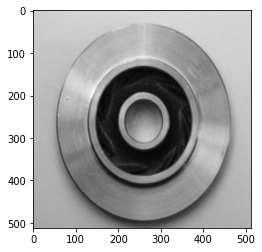

In [46]:
import cv2
import matplotlib.pyplot as plt

# reading image
image = cv2.imread("E:\casting_512x512\Test\ok_front_test\cast_ok_0_35.jpeg")

# displaying image
plt.imshow(image)
cv2.waitKey(0)
plt.show()